# Hypothesis Testing in Python

## 1. Introduction to Hypothesis Testing

Answer: It provides a way to check outcomes of competing scenarios and decide which way to proceed.

In [24]:
import pandas as pd

late_shipments = pd.read_feather('late_shipments.feather')
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [25]:
# Calculate the proportion of late shipments
late_prop_samp = late_shipments['late'].value_counts(normalize=True)

# Print the results
print(late_prop_samp)

No     0.939
Yes    0.061
Name: late, dtype: float64


In [27]:
import numpy as np

late_shipments_boot_distn = [late_shipments['late']\
                             .sample(frac=1, replace=True)\
                             .value_counts(normalize=True)[1] 
                             for _ in range(5000)]

In [29]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp[1] - late_prop_hyp) / std_error

# Print z_score
print(z_score)

0.13416912985987547


Answer: Just as the defendant is initially assumed not guilty, the null hypothesis is first assumed to be true.

Answer:

Two tails: Should we expect Slack and Zoom to have dissimilar mean numbers of employees over the last three years?, Is there a difference between the voting preferences of 40-year-olds and 80-year-olds?

Left tail: Is there evidence to conclude that Belgian workers tend to have lower salaries than Italian workers?, Are grapes lower in popularity than raisins, on average?

Right tail: Does there tend to be more than 12 fluid ounces of soda per can?, Do hamburgers have more calories than hot dogs, on average?, Do cats tend to live longer than dogs?

Answer: Right-tailed

In [32]:
from scipy.stats import norm

late_prop_samp = 0.061
late_prop_hyp = 0.06
std_error = 0.007488520883926666

# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Calculate the p-value
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
                 
# Print the p-value
print(p_value) 

0.4468840678346485


Answer: If ${p \le \alpha}$, reject ${H_0}$.

In [33]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.047, 0.076)


Answer: Yes, since 0.06 is included in the 95% confidence interval and we failed to reject ${H_0}$ due to a large p-value, the results are similar.

Answer:

False positive (Type I) errors: Finding the defendant guilty when in fact the defendant was innocent, Rejecting the null hypothesis when in fact the null hypothesis is true.

False negative (Type II) errors: Failing to reject the null hypothesis when in fact the null hypothesis is false, Finding the defendant not guilty when in fact the defendant did commit the crime.

Not an error: Finding the defendant not guilty when in fact they were innocent, Finding the defendant guilty when in fact they did commit the crime, Failing to reject the null hypothesis when in fact the null hypothesis is true, Rejecting the null hypothesis when in fact the null hypothesis is false.

## 2. Two-Sample and ANOVA Tests

Answer:
- Identify population parameter that is hypothesized about.
- Specify the null and alternative hypotheses.
- Determine (standardized) test statistic and corresponding null distribution.
- Conduct hypothesis test in Python.
- Measure evidence against the null hypothesis.
- Make a decision comparing evidence to significance level.
- Interpret the results in the context of the original problem.

In [35]:
xbar_yes = 2715.6721311475408
xbar_no = 1897.7912673056444
s_yes = 2544.688210903328
s_no = 3154.0395070841687
n_yes = 61
n_no = 939

In [36]:
# Calculate the numerator of the test statistic
numerator = xbar_yes - xbar_no

# Calculate the denominator of the test statistic
denominator = np.sqrt((s_yes ** 2 / n_yes) + (s_no ** 2 / n_no))

# Calculate the test statistic
t_stat = numerator / denominator

# Print the test statistic
print(t_stat)

2.3936661778766433


Answer: When a sample standard deviation is used in estimating a standard error.

Answer: As you increase the degrees of freedom, the t-distribution PDF and CDF curves get closer to those of a normal distribution.

Answer: Left-tailed

In [37]:
from scipy.stats import t

t_stat = -2.3936661778766433

# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes - 2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, degrees_of_freedom)

# Print the p_value
print(p_value)

0.008432382146249523


Answer: Reject the null hypothesis.

Answer:

Paired: To test the effectiveness of a new elementary school study technique, pre- and post-tests are given to the same random sample of students, Scientists wish to understand whether older children like sugar less than younger children. Sibling pairs were surveyed on their sugar preferences.

Not paired: To test the effectiveness of a new elementary school study technique, pre- and post-tests are given to two different random samples of students, To understand how location affects income, a survey of adults living in Budapest and another survey of adults living in London were conducted.

In [38]:
dem_votes_potus_12_16 = pd.read_feather('dem_votes_potus_12_16.feather')
dem_votes_potus_12_16.head()

,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352
2,Alabama,Clay,26.673672,18.674517
3,Alabama,Cullman,14.661752,10.028252
4,Alabama,Escambia,36.915731,31.020546


In [44]:
sample_dem_data = dem_votes_potus_12_16.sample(n=500)

In [45]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Print sample_dem_data
sample_dem_data

,state,county,dem_percent_12,dem_percent_16,diff
263,Nebraska,Antelope,17.667079,11.673270,5.993809
109,Illinois,Whiteside,57.819443,43.135799,14.683645
372,Pennsylvania,Schuylkill,42.520831,26.674514,15.846317
66,Georgia,Columbia,27.919488,29.172266,-1.252778
194,Michigan,Arenac,46.792501,30.977131,15.815370
...,...,...,...,...,...
483,Wisconsin,Columbia,56.226675,45.433476,10.793199
434,Texas,Parker,16.465383,14.685745,1.779638
46,Colorado,Morgan,36.299527,26.346154,9.953373
223,Mississippi,Calhoun,36.587436,29.862414,6.725022


In [46]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Print xbar_diff
print(xbar_diff)

6.829312660106834


In [47]:
# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std(ddof=1)

# Print s_diff
print(s_diff)

5.040139140132317


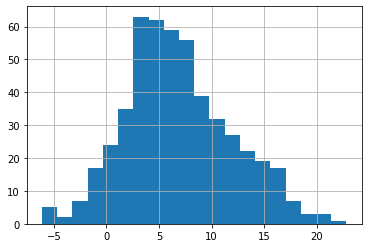

In [49]:
import matplotlib.pyplot as plt

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

In [51]:
import pingouin

# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], y=0, alternative='two-sided')
                              
# Print the test results
test_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",1.354985,2.246e+111,1.0


Answer: Reject the null hypothesis.

In [52]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
                                     y=sample_dem_data['dem_percent_16'], 
                                     paired=True, 
                                     alternative='two-sided')
                            
# Print the paired test results
paired_test_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",0.454202,2.246e+111,1.0


Answer: The p-value from the unpaired test is greater than than the p-value from the paired test.

In [53]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].mean()

# Print the grouped means
print(xbar_pack_by_mode)

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64


In [54]:
# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Print the grouped standard deviations
print(s_pack_by_mode)

shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64


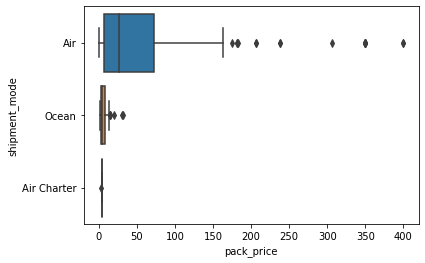

In [56]:
import seaborn as sns

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x='pack_price', y='shipment_mode', data=late_shipments)
plt.show()

In [57]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments, dv='pack_price', between='shipment_mode')

# Print anova_results
anova_results

,Source,ddof1,ddof2,F,p-unc,np2
0,shipment_mode,2,997,21.8646,5.089479e-10,0.042018


Answer: Yes. The p-value is less than or equal to the significance level, so the null hypothesis should be rejected.

In [58]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data=late_shipments, dv='pack_price', between='shipment_mode', padjust='none')

# Print pairwise_results
pairwise_results

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,15.277,-0.423775


In [59]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
pairwise_results

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,2.624504e-74,bonf,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,2.080367e-70,bonf,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,9.369037e-03,bonf,15.277,-0.423775


Answer: "Ocean" and "Air Charter"; "Ocean" and "Air"; "Air Charter" and "Air".

## 3. Proportion Tests

Answer: ${z}$: The test statistic for proportion(s) has only one estimate of a parameter instead of two.

In [63]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = len(late_shipments[late_shipments['late'] == 'Yes']) / len(late_shipments)
# Alternatively, 
# p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Print p_hat and n
print(p_hat, n)

0.061 1000


In [64]:
# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Print the result
print(z_score)

0.13315591032282698


In [65]:
# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print(p_value)

0.44703503936503364


In [77]:
late_shipments['freight_cost_group'] = np.array(['expensive' if i >= 5000 else 'reasonable' 
                                                 for i in late_shipments['freight_cost_usd']])

In [93]:
p_hats = late_shipments.groupby('freight_cost_group')['late'].value_counts(normalize=True)[:, 'Yes']
p_hats

freight_cost_group
expensive     0.079096
reasonable    0.040512
Name: late, dtype: float64

In [94]:
ns = late_shipments['freight_cost_group'].value_counts()
ns

expensive     531
reasonable    469
Name: freight_cost_group, dtype: int64

In [95]:
# Calculate the pooled estimate of the population proportion
p_hat = (ns['expensive'] * p_hats['expensive'] + ns['reasonable'] * p_hats['reasonable']) / (ns['expensive'] + ns['reasonable'])

# Print the result
print(p_hat)

0.061


In [96]:
# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns['expensive'] + p_hat_times_not_p_hat / ns['reasonable']

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Print the result
print(std_error)

0.015165754859652058


In [97]:
# Calculate the z-score
z_score = (p_hats['expensive'] - p_hats['reasonable']) / std_error

# Print z_score
print(z_score)

2.5441739284274627


In [98]:
# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print p_value
print(p_value)

0.005476826373292831


In [105]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby('freight_cost_group')['late'].value_counts()

# Print the counts
print(late_by_freight_cost_group)

freight_cost_group  late
expensive           No      489
                    Yes      42
reasonable          No      450
                    Yes      19
Name: late, dtype: int64


In [103]:
from statsmodels.stats.proportion import proportions_ztest

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([45, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([500 + 45, 439 + 16])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count=success_counts, nobs=n, alternative='larger')

# Print the results
print(stat, p_value)

3.1190401865206128 0.0009072060637051224


Answer: As you increase the degrees of freedom or the non-centrality, the chi-square distribution PDF and CDF curves get closer to those of a normal distribution.

Answer: Right-tailed

In [104]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_group'].value_counts(normalize=True)

# Print props
print(props)

vendor_inco_term  freight_cost_group
CIP               reasonable            0.714286
                  expensive             0.285714
DDP               expensive             0.550000
                  reasonable            0.450000
DDU               reasonable            1.000000
EXW               expensive             0.577869
                  reasonable            0.422131
FCA               reasonable            0.666667
                  expensive             0.333333
Name: freight_cost_group, dtype: float64


In [107]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_group'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Print wide_props
wide_props

freight_cost_group,expensive,reasonable
vendor_inco_term,,
CIP,0.285714,0.714286
DDP,0.550000,0.450000
DDU,NaN,1.000000
EXW,0.577869,0.422131
FCA,0.333333,0.666667


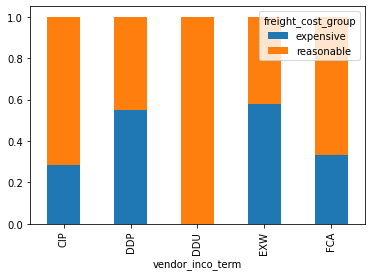

In [108]:
# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind='bar', stacked=True)
plt.show()

In [109]:
# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, 
                                                       x='freight_cost_group', 
                                                       y='vendor_inco_term', 
                                                       correction=False)

# Print results
print(stats[stats['test'] == 'pearson']) 

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  38.677824  4.0  8.119795e-08  0.196667  0.999748


C:\Users\Erturk Memmedli\AppData\Local\Programs\Python\Python310\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\Erturk Memmedli\AppData\Local\Programs\Python\Python310\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\Erturk Memmedli\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:7416: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\Erturk Memmedli\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:7416: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\Erturk Memmedli\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:7413: RuntimeWarni

Answer: Reject the null hypothesis and conclude that vendor_inco_term and freight_cost_group are associated.

In [121]:
late_shipments = late_shipments[late_shipments['vendor_inco_term'] != 'DDU']

incoterm_counts = late_shipments['vendor_inco_term'].value_counts()\
                                                    .rename_axis('vendor_inco_term')\
                                                    .reset_index(name='n')\
                                                    .sort_values('vendor_inco_term')

incoterm_counts

,vendor_inco_term,n
3,CIP,56
2,DDP,100
0,EXW,732
1,FCA,111


In [122]:
hypothesized = pd.DataFrame({'vendor_inco_term' : ['CIP', 'DDP', 'EXW', 'FCA'], 'prop' : [0.05, 0.1, 0.75, 0.1]})

hypothesized

,vendor_inco_term,prop
0,CIP,0.05
1,DDP,0.10
2,EXW,0.75
3,FCA,0.10


In [123]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Print n_total
print(n_total)

999


In [125]:
# Create n column that is prop column * n_total
hypothesized['n'] = hypothesized['prop'] * n_total
# Print the modified hypothesized DataFrame
hypothesized

,vendor_inco_term,prop,n
0,CIP,0.05,49.95
1,DDP,0.10,99.90
2,EXW,0.75,749.25
3,FCA,0.10,99.90


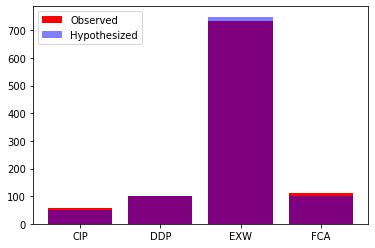

In [130]:
# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color='red', label="Observed")

# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'], color='blue', alpha=0.5, label="Hypothesized")
plt.legend()
plt.show()

In [131]:
from scipy.stats import chisquare

# Perform a goodness of fit test on the incoterm counts n
gof_test = chisquare(f_obs=incoterm_counts['n'], f_exp=hypothesized['n'])

# Print gof_test results
print(gof_test)

Power_divergenceResult(statistic=2.3633633633633613, pvalue=0.5004909543758687)


Answer: Fail to reject the null hypothesis and conclude that n follows the distribution specified by hypothesized.

## 4. Non-Parametric Tests

Answer: Sample observations have no direct relationship with each other.

In [132]:
# Count the freight_cost_group values
counts = late_shipments['freight_cost_group'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

expensive     531
reasonable    468
Name: freight_cost_group, dtype: int64
True


In [133]:
# Count the late values
counts = late_shipments['late'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())

No     938
Yes     61
Name: late, dtype: int64
True


In [134]:
# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby('vendor_inco_term')['freight_cost_group'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())

vendor_inco_term  freight_cost_group
CIP               reasonable             40
                  expensive              16
DDP               expensive              55
                  reasonable             45
EXW               expensive             423
                  reasonable            309
FCA               reasonable             74
                  expensive              37
Name: freight_cost_group, dtype: int64
True


In [135]:
# Count the shipment_mode values
counts = late_shipments['shipment_mode'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

Air            905
Ocean           88
Air Charter      6
Name: shipment_mode, dtype: int64
False


Answer: Paired t-test

In [137]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
                                     y=sample_dem_data['dem_percent_16'], 
                                     paired=True, 
                                     alternative='greater') 

# Print paired t-test results
paired_test_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,greater,1.800317e-115,"[6.46, inf]",0.454202,4.491e+111,1.0


In [138]:
# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(x=sample_dem_data['dem_percent_12'], 
                                          y=sample_dem_data['dem_percent_16'], 
                                          alternative='greater')

# Print Wilcoxon test results
wilcoxon_test_results

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,122849.0,greater,8.901980e-78,0.961661,0.644816


In [139]:
# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms', 'late']]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')


# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide['Yes'], y=weight_vs_late_wide['No'], alternative='two-sided')

# Print the test results
wmw_test

,U-val,alternative,p-val,RBC,CLES
MWU,38087.0,two-sided,0.000014,-0.331294,0.665647


In [140]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=late_shipments, dv='weight_kilograms', between='shipment_mode')

# Print the results
kw_test

,Source,ddof1,H,p-unc
Kruskal,shipment_mode,2,124.983244,7.248254e-28
